# Latihan 1 - Implementasi Clustering dengan K-Means

In [1]:
# Mengimpor library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Mengimpor dataset
dataset = pd.read_csv('Customer.csv')
dataset.head()

,IDPelanggan,Kelamin,Usia,Rating_belanja (1-100),Pendapatan (juta Rp)
0,1,Perempuan,23,87,29
1,2,Laki,60,4,30
2,3,Perempuan,21,73,30
3,4,Laki,53,4,33
4,5,Laki,18,92,33


In [3]:
# Menyeleksi Kolom Rating belanja dan Pendapatan, lalu menyimpannya dalam variabel X
X = dataset.iloc[:, [3, 4]].values

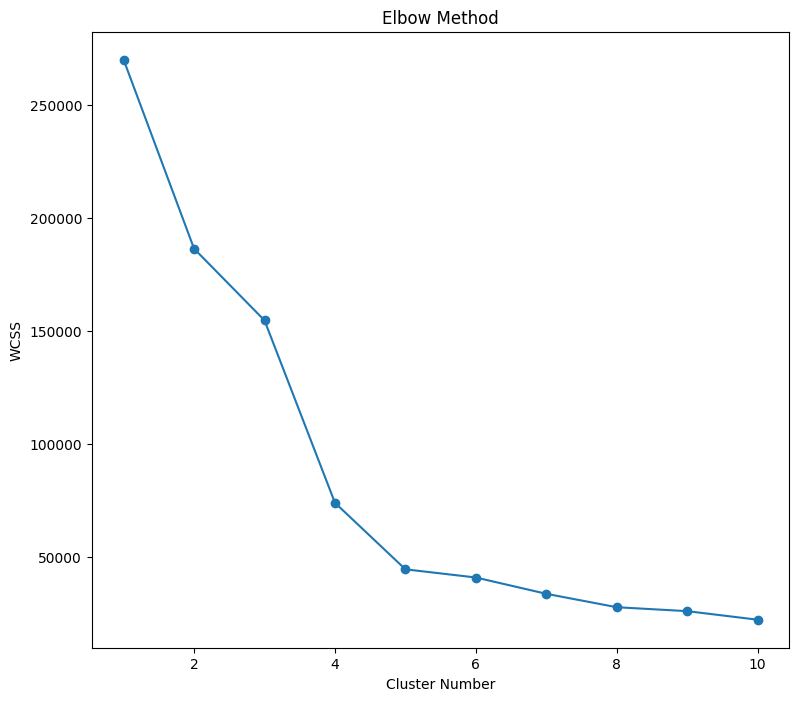

In [4]:
# Menggunakan metode elbow untuk menentukan angka cluster yang tepat
from sklearn.cluster import KMeans

WCSS = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    WCSS.append(kmeans.inertia_)

plt.figure(figsize=(9, 8))
plt.plot(range(1, 11), WCSS, marker = 'o')
plt.title('Elbow Method')
plt.xlabel('Cluster Number')
plt.ylabel('WCSS')
plt.show()

In [5]:
# Menjalankan K-Means Clustering ke dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

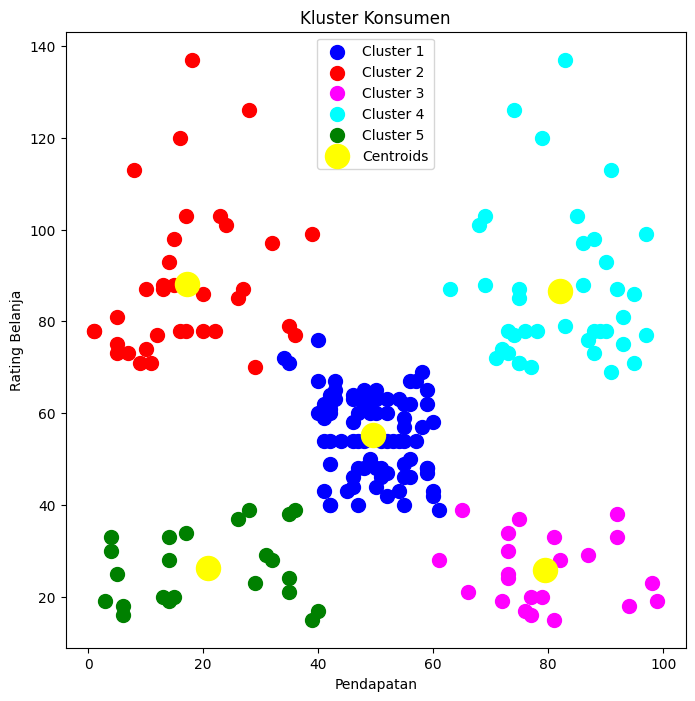

In [6]:
# Visualisasi hasil clusters
plt.figure(figsize=(8, 8))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'red', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'magenta', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'green', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Kluster Konsumen')
plt.xlabel('Pendapatan')
plt.ylabel('Rating Belanja')
plt.legend()
plt.show()

# Latihan 2 - Implementasi Clustering dengan Hierachical

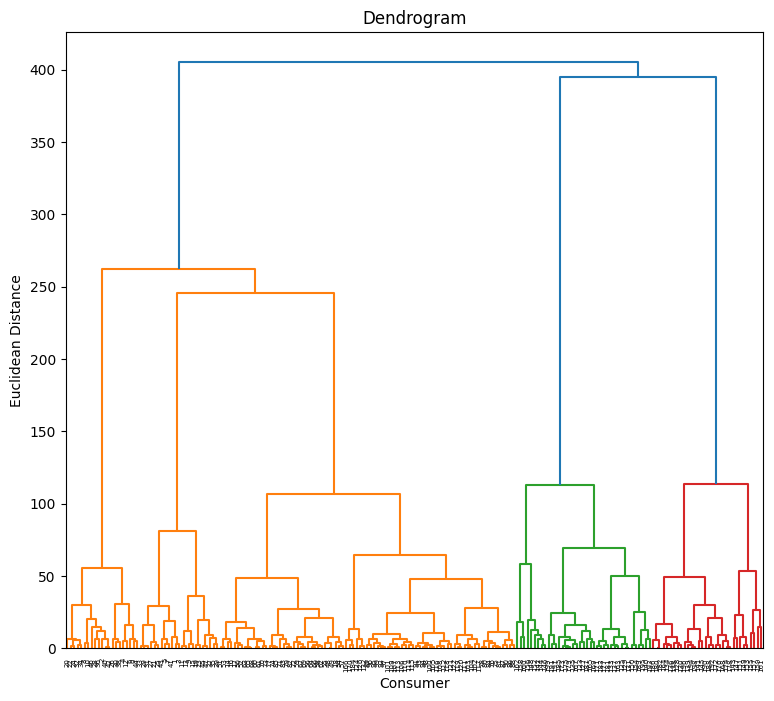

In [7]:
# Menggunakan dendrogram untuk menentukan angka cluster yang tepat
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(9, 8))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Consumer')
plt.ylabel('Euclidean Distance')
plt.show()

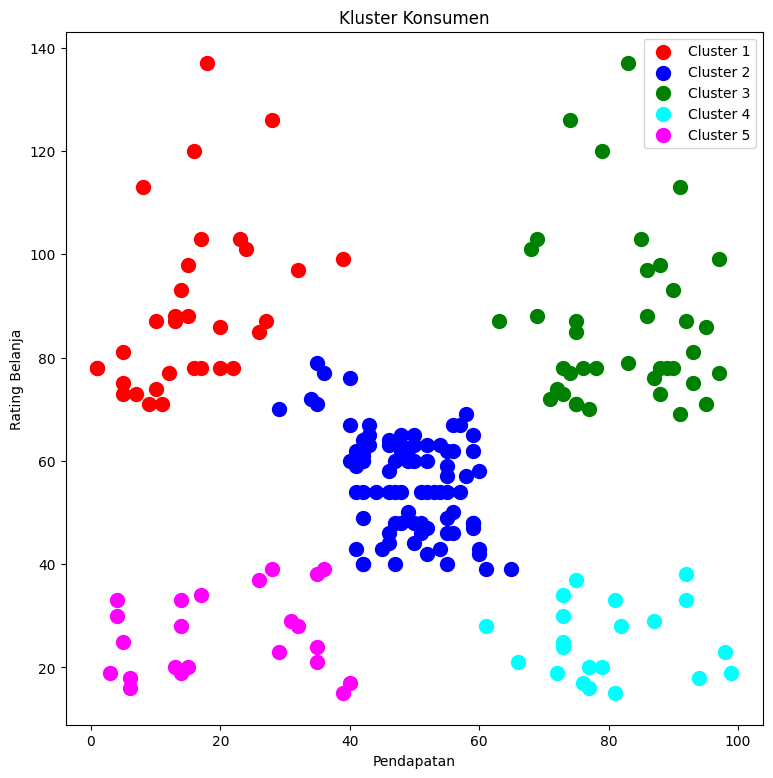

In [8]:
# Menjalankan Hierarchical Clustering ke dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, metric = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)
 
# Visualisasi hasil clusters
plt.figure(figsize=(9, 9))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Kluster Konsumen')
plt.xlabel('Pendapatan')
plt.ylabel('Rating Belanja')
plt.legend()
plt.show()



# Latihan 3 - Implementasi Clustering dengan DBSCAN

In [9]:
# Import Library yang dibutuhkan
import matplotlib.pyplot as plt	
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn import datasets


In [10]:
# Membuat dataset dengan make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.50, random_state=0)



In [11]:
X, y_true

(array([[ 1.03992529,  1.92991009],
        [-1.38609104,  7.48059603],
        [ 1.12538917,  4.96698028],
        [-1.05688956,  7.81833888],
        [ 1.4020041 ,  1.726729  ],
        [ 3.20722587,  0.36765575],
        [-1.76133611,  1.81716162],
        [ 1.34081536,  4.36827878],
        [-0.37881944,  8.33265721],
        [-0.80062564,  8.52294205],
        [-1.68146124,  2.80114893],
        [-2.43304923,  8.26748617],
        [ 1.19820169,  4.47062449],
        [-2.06457304,  7.05157615],
        [ 1.55515985,  0.12527811],
        [ 0.5408715 ,  4.0143625 ],
        [ 1.05374379,  4.49286859],
        [ 2.48368283,  0.57215086],
        [-1.14357242,  3.09602867],
        [-1.15330985,  2.32340978],
        [ 2.60509732,  1.22529553],
        [ 1.82346953,  1.1384044 ],
        [ 0.77468161,  4.91500986],
        [-1.91821859,  2.86268761],
        [-1.85305081,  2.65728761],
        [-0.30022483,  4.63059663],
        [ 1.7571105 ,  0.87138001],
        [ 0.65834704,  4.642

In [12]:
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

In [13]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

['y', 'b', 'g', 'r']


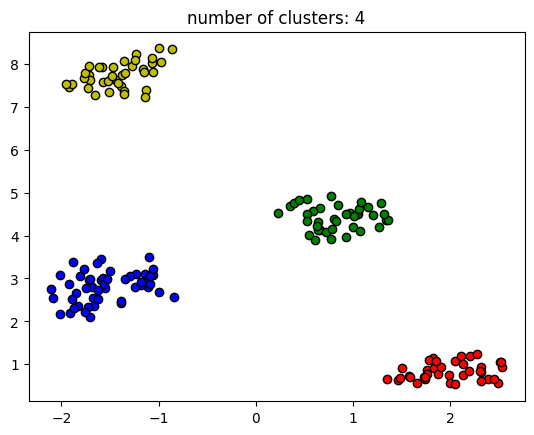

In [14]:
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = ['y', 'b', 'g', 'r']
print(colors)
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'
 
    class_member_mask = (labels == k)
 
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k',
             markersize=6)
 
    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k',
             markersize=6)
 
plt.title('number of clusters: %d' % n_clusters_)
plt.show()

